# So to address the uncertainty analysis issues faced in the previous notebook we will consider the worst and best case nozzil position and the worst and best case shock location

In [436]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

In [437]:
inchHg= 29.03 # inch Hg for calculating pressure
inchTOm = 25.4 * 1e-3 # inch to m conversion
T = 23.01 + 273.15 # K
g = 9.81 # m/s^2 gravity
R = 287.05 # J/(kg K) specific gas constant of air

# desnity from temperature calculation
rho_Hg = 13545 # kg/m^3 density of mercury
rho_H2O = 1000 # kg/m^3 density of water

u_rho_Hg = 0.1 / rho_Hg # relative uncertainty in density of mercury
u_inchesHg = 0.001 / inchHg # relative uncertainty of measured inches of mercury


In [438]:
P0 =  rho_Hg * g * inchHg * inchTOm # Pa
u_P0 = u_rho_Hg + u_inchesHg # relative uncertainty in pressure

print(f"The Atmospheric Pressure is {P0} Pa")

# density of air calculation
rho_air = P0 / (R * T) # kg/m^3
print(f"The density of air is {rho_air} kg/m^3")

The Atmospheric Pressure is 97978.04492490001 Pa
The density of air is 1.1525103032207134 kg/m^3


In [439]:
oriface_diameter = 17.47 * 1e-3 # mm to m
oriface_area = np.pi * oriface_diameter**2 / 4 # m^2

pipe_area = 10 * oriface_area # ?
print(f"The area of the oriface is {oriface_area} m^2")

# flow rate calculation
Cd = 0.62
def calc_mass_flow_rate(dh):
    dp = rho_H2O * g * dh
    rA = oriface_area / pipe_area
    Q = Cd * oriface_area * np.sqrt(2 * dp / (rho_air)) 
    return rho_air * Q

C1_dh_oriface = 13.2 - 9.6
C2_dh_oriface = 13.7 - 8.8
C3_dh_oriface = 13.7 - 8.8
C4_dh_oriface = 13.7 - 8.8

C1_md = calc_mass_flow_rate(C1_dh_oriface * 1e-2)
C2_md = calc_mass_flow_rate(C2_dh_oriface * 1e-2)
C3_md = calc_mass_flow_rate(C3_dh_oriface * 1e-2)
C4_md = calc_mass_flow_rate(C4_dh_oriface * 1e-2)

print(f"The flow rate for C1 is {C1_md} kg/s")
print(f"The flow rate for C2 is {C2_md} kg/s")
print(f"The flow rate for C3 is {C3_md} kg/s")
print(f"The flow rate for C4 is {C4_md} kg/s")

The area of the oriface is 0.00023970422632724826 m^2
The flow rate for C1 is 0.0042402410000425385 kg/s
The flow rate for C2 is 0.004946947833382961 kg/s
The flow rate for C3 is 0.004946947833382961 kg/s
The flow rate for C4 is 0.004946947833382961 kg/s


In [440]:
def get_rp(tab):
    dh = (tab[:,2] - tab[:,1]) * 1e-2 # m
    p = P0 - rho_Hg * g * dh

    return p / P0

def get_u_rp(tab):
    h1 = tab[:,1]
    h2 = tab[:,2]

    u_h1 = 0.1 / h1 # 2 mm measurements means pm 1 mm
    u_h2 = 0.1 / h2 # 2 mm measurements means pm 1 mm
    
    u_rp = u_P0 + u_rho_Hg + np.sqrt(u_h1**2 + u_h2**2)
    return u_rp

C1 = np.loadtxt('../Supersonic_Nozzle/case1.txt', skiprows=1)
C1_rp, C1_u_rp = get_rp(C1), get_u_rp(C1)
C2 = np.loadtxt('../Supersonic_Nozzle/case2.txt', skiprows=1)
C2_rp, C2_u_rp = get_rp(C2), get_u_rp(C2)
C3 = np.loadtxt('../Supersonic_Nozzle/case3.txt', skiprows=1)
C3_rp, C3_u_rp = get_rp(C3), get_u_rp(C3)
C4 = np.loadtxt('../Supersonic_Nozzle/case4.txt', skiprows=1)
C4_rp, C4_u_rp = get_rp(C4), get_u_rp(C4)


In [441]:

def calc_M(rp):
    # calc mach number from pressure ratio
    g = 1.4
    M2 = (rp ** -((g-1)/g) - 1) * 2 / (g - 1)
    return np.sqrt(M2)

def calc_u_M(rp, u_rp):
    # u_M = u_rp * dM/drp

    g = 1.4
    dM2 = - 2 / g * rp ** (-((g-1)/g) - 1)
    u_M = u_rp * dM2
    return u_M

C1_M, C1_u_M = calc_M(C1_rp), calc_u_M(C1_rp, C1_u_rp)
C2_M, C2_u_M = calc_M(C2_rp), calc_u_M(C2_rp, C2_u_rp)
C3_M, C3_u_M = calc_M(C3_rp), calc_u_M(C3_rp, C3_u_rp)
C4_M, C4_u_M = calc_M(C4_rp), calc_u_M(C4_rp, C4_u_rp)


In [442]:
import sympy as sp

def Ms_from_M(M):
    g = 1.4
    return np.sqrt((1 + (g - 1) / 2 * M**2) / (g * M**2 - (g - 1) / 2))

def rP0s_from_M(M):
    g = 1.4
    return (((g + 1) / 2 * M**2) / (1 + (g - 1) / 2 * M **2)) ** (g / (g - 1)) * (2 * g / (g + 1) * M**2 - (g - 1) / (g + 1)) ** - (1 / (g - 1))

def u_rP0s_from_u_M(Mval, u_M):
    # need analytical derivative of rP0s_from_M
    # using sympy

    M = sp.symbols('M')
    g  = sp.symbols('gamma')
    rP0_expr = (((g + 1) / 2 * M**2) / (1 + (g - 1) / 2 * M **2)) ** (g / (g - 1)) * (2 * g / (g + 1) * M**2 - (g - 1) / (g + 1)) ** - (1 / (g - 1))
    dM_expr = sp.diff(rP0_expr, M)

    tex = sp.latex(dM_expr)
    print(tex)

    # evaluate at M
    dM = dM_expr.evalf(subs={M: Mval, g: 1.4})
    u_rP0s = np.abs(u_M * dM)
    return float(u_rP0s)

C3_SHOCK_LOCATION = 15
C3_rp_corrected = C3_rp.copy()
C3_rp_corrected[:C3_SHOCK_LOCATION] /= rP0s_from_M(C4_M[C3_SHOCK_LOCATION])

C3_rp_corrected[7] = (C3_rp_corrected[6] + C3_rp_corrected[8]) / 2


In [443]:
# find nozzil location
def lerp(x1, x2, y1, y2, x):
    return (y2 - y1) / (x2 - x1) * (x - x1) + y1

def find_nozzil_location(rp, x, y):
    for i in range(len(rp)):
        if rp[i] < 0.5283:
            break
    # linear interpolation
    return lerp(rp[i], rp[i-1], x[i], x[i-1], 0.5283)

exact_nozzil_location = find_nozzil_location(C3_rp_corrected, C3[:,0], C3_rp_corrected)
print(f"Exact nozzil location is {exact_nozzil_location}")
NOZZIL_LOCATION = np.ceil(exact_nozzil_location) - 1

Exact nozzil location is 8.871788970686456


In [444]:
# find shock location
def find_shock_location(rp, x, y):
    return find_nozzil_location(rp[::-1], x[::-1], y[::-1])

exact_shock_location = find_shock_location(C3_rp_corrected, C3[:,0], C3_rp_corrected)
low_rp = C3_rp_corrected * (1 - C3_u_rp)
hi_rp = C3_rp_corrected * (1 + C3_u_rp)
right_shock_location = find_shock_location(low_rp, C3[:,0], low_rp)
left_shock_location = find_shock_location(hi_rp, C3[:,0], hi_rp)

C3_SHOCK_LEFT = np.round(left_shock_location, 0).astype(int) - 1 # index
C3_SHOCK_RIGHT = np.round(right_shock_location, 0).astype(int) - 1

print(left_shock_location, right_shock_location)

16.25991365026565 16.318123700350586


In [445]:

def interpolate_M(M, x, y, x0):
    for i in range(len(M)):
        if x[i] < x0:
            break
    return lerp(x[i], x[i-1], M[i], M[i-1], x0)

def interpolate_u_M(M, u_M, x, y, x0):
    for i in range(len(M)):
        if x[i] < x0:
            break
    return lerp(x[i], x[i-1], u_M[i], u_M[i-1], x0)

M_at_left_shock = interpolate_M(C4_M, C3[:,0], C4_M, left_shock_location)
M_at_right_shock = interpolate_M(C4_M, C3[:,0], C4_M, right_shock_location)

u_M_at_left_shock = interpolate_u_M(C4_M, C3_u_M, C3[:,0], C4_M, left_shock_location)
u_M_at_right_shock = interpolate_u_M(C4_M, C3_u_M, C3[:,0], C4_M, right_shock_location)

low_r_P0s_at_left_shock = rP0s_from_M(M_at_left_shock * (1 - u_M_at_left_shock))
hi_r_P0s_at_left_shock = rP0s_from_M(M_at_left_shock * (1 + u_M_at_left_shock))
max_r_P0s_at_left_shock = min(low_r_P0s_at_left_shock, hi_r_P0s_at_left_shock)

# The right shock should be at a higher mach number than the left shock so take max mach which is min pressure
low_r_P0s_at_right_shock = rP0s_from_M(M_at_right_shock * (1 - u_M_at_right_shock))
hi_r_P0s_at_right_shock = rP0s_from_M(M_at_right_shock * (1 + u_M_at_right_shock))
min_r_P0s_at_right_shock = max(low_r_P0s_at_right_shock, hi_r_P0s_at_right_shock)

# now find uncertainty at left and right shocks
low_u_r_P0s_at_left_shock = u_rP0s_from_u_M(M_at_left_shock * (1 - u_M_at_left_shock), u_M_at_left_shock)
hi_u_r_P0s_at_left_shock = u_rP0s_from_u_M(M_at_left_shock * (1 + u_M_at_left_shock), u_M_at_left_shock)
u_r_P0s_at_left_shock = max(low_u_r_P0s_at_left_shock, hi_u_r_P0s_at_left_shock)

low_u_r_P0s_at_right_shock = u_rP0s_from_u_M(M_at_right_shock * (1 - u_M_at_right_shock), u_M_at_right_shock)
hi_u_r_P0s_at_right_shock = u_rP0s_from_u_M(M_at_right_shock * (1 + u_M_at_right_shock), u_M_at_right_shock)
u_r_P0s_at_right_shock = max(low_u_r_P0s_at_right_shock, hi_u_r_P0s_at_right_shock)

# so now know total error band due to uncertainty in shock position

print(f"M at left shock is {M_at_left_shock} +- {u_M_at_left_shock}")
print(f"M at right shock is {M_at_right_shock} +- {u_M_at_right_shock}")

- \frac{4 M \gamma \left(\frac{M^{2} \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1}\right)^{\frac{\gamma}{\gamma - 1}} \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)^{- \frac{1}{\gamma - 1}}}{\left(\gamma - 1\right) \left(\gamma + 1\right) \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)} + \frac{\gamma \left(\frac{M^{2} \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1}\right)^{\frac{\gamma}{\gamma - 1}} \left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right) \left(\frac{2 M^{2} \gamma}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}\right)^{- \frac{1}{\gamma - 1}} \left(- \frac{2 M^{3} \left(\frac{\gamma}{2} - \frac{1}{2}\right) \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{\left(M^{2} \left(\frac{\gamma}{2} - \frac{1}{2}\right) + 1\right)^{2}} + \frac{2 M \left(\frac{\gamma}{2} + \frac{1}{2}\right)}{M^{2} \left(\fra

diff in end points 0.001


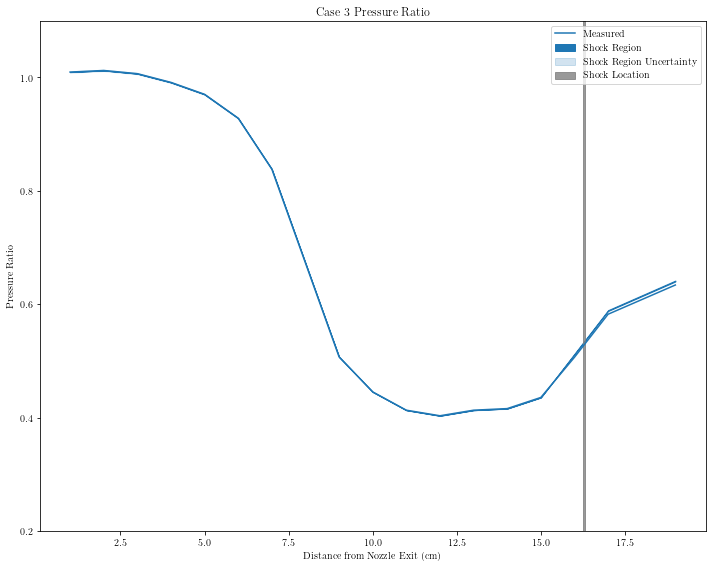

In [446]:
# plot case 3 only

fig,ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(C3[:, 0], C3_rp_corrected[:], label='Measured')


C3_left_shock = C3_rp_corrected.copy()
C3_left_shock[C3_SHOCK_LEFT:] /= max_r_P0s_at_left_shock
C3_right_shock = C3_rp_corrected.copy()
C3_right_shock[C3_SHOCK_RIGHT:] /= min_r_P0s_at_right_shock

ax.fill_between(C3[:,0], C3_left_shock, C3_right_shock, label='Shock Region', color = 'C0')
ax.fill_between(C3[:,0], 
                C3_left_shock * ( 1 + u_r_P0s_at_left_shock), 
                C3_right_shock * (1 - u_r_P0s_at_right_shock), 
                label='Shock Region Uncertainty',
                alpha=0.2, color = 'C0')

ax.fill_betweenx([-1, 2], left_shock_location, right_shock_location, alpha=0.8, label='Shock Location', color = 'grey')
ax.set_ylim(0.2, 1.1)

ax.set_xlabel('Distance from Nozzle Exit (cm)')
ax.set_ylabel('Pressure Ratio')
ax.set_title('Case 3 Pressure Ratio')
ax.legend()
plt.tight_layout()
#plt.savefig('case3_pressure_ratio.png', dpi=300)

diff = np.abs(C3_left_shock[-1] - C3_right_shock[-1])
print(f"diff in end points {diff:.3f}")

# first two figures

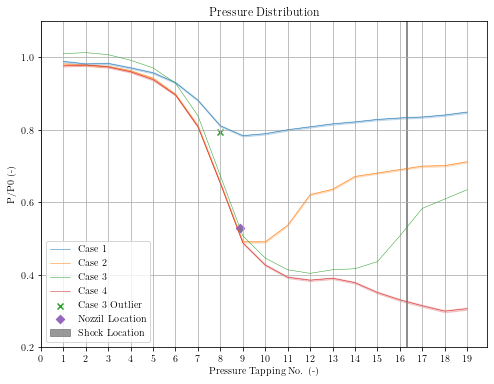

In [447]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(C1[:,0], C1_rp, label='Case 1', linewidth = 0.5, color='C0')
ax.fill_between(C1[:,0], C1_rp * (1 - C1_u_rp), C1_rp * (1 + C1_u_rp), alpha=0.2, color='C0')
ax.plot(C2[:,0], C2_rp, label='Case 2', linewidth = 0.5, color='C1')
ax.fill_between(C2[:,0], C2_rp * (1 - C2_u_rp), C2_rp * (1 + C2_u_rp), alpha=0.2, color='C1')
#ax.plot(C3[:,0], C3_rp, label='Case 3')
ax.plot(C3[:,0], C3_rp_corrected, label='Case 3', linewidth = 0.5, color='C2')
#ax.fill_between(C3[:,0], C3_rp_corrected * (1 - C3_u_rp_corrected), C3_rp_corrected * (1 + C3_u_rp_corrected), alpha=0.2, color='C2')
ax.plot(C4[:,0], C4_rp, label='Case 4', linewidth = 0.5, color='C3')
ax.fill_between(C4[:,0], C4_rp * (1 - C4_u_rp), C4_rp * (1 + C4_u_rp), alpha=0.2, color='C3')

ax.scatter(C3[7,0], C3_rp[7], label='Case 3 Outlier', color='C2', marker='x')
ax.scatter(exact_nozzil_location, 0.5283, label='Nozzil Location', marker='D', c='C4')

ax.fill_betweenx([-1, 2], left_shock_location, right_shock_location, alpha=0.8, label='Shock Location', color = 'grey')
ax.set_ylim(0.2, 1.1)

plt.xticks(np.arange(0, 20, 1))

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.grid()
plt.legend()

#plt.savefig('pressure_ratio_distribution_corrected.png', dpi=300)
plt.show()